In [ ]:
import cv2

# 1. Assume that the image img2 has already been loaded
# If not loaded, use the following line:
img2 = cv2.imread('12.jpg')

# 2. Create a 90-degree rotated version (clockwise)
img_90 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

# 3. Create a 180-degree rotated version
img_180 = cv2.rotate(img2, cv2.ROTATE_180)

# 4. Create a 270-degree rotated version (90 degrees counterclockwise)
img_270 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

# 5. Display or save the images (optional)
cv2.imwrite('img_90.jpg', img_90)
cv2.imwrite('img_180.jpg', img_180)
cv2.imwrite('img_270.jpg', img_270)


True

In [ ]:
# 1. Initialize the SIFT detector
sift = cv2.SIFT_create()

# 2. Extract keypoints and descriptors for the original image (img2)
kp_ref, des_ref = sift.detectAndCompute(img2, None)

# List of rotated images created in the previous step
rotated_images = [img_90, img_180, img_270]
titles = ["90 Degrees", "180 Degrees", "270 Degrees"]

# Create BFMatcher object
bf = cv2.BFMatcher()

for i, img_rot in enumerate(rotated_images):
    # a) Extract features for the rotated image
    kp_rot, des_rot = sift.detectAndCompute(img_rot, None)
    
    # b) Match descriptors using knnMatch (k=2)
    matches = bf.knnMatch(des_ref, des_rot, k=2)
    
    # c) Apply the Ratio Test (Lowe's criterion)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    
    # d) Print the number of good matches found
    print(f"Matches found in {titles[i]}: {len(good_matches)}")
    
    # e) Draw and display the matches (optional)
    img_match = cv2.drawMatches(
        img2, kp_ref,
        img_rot, kp_rot,
        good_matches[:50],
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    cv2.imshow(f'Matching {titles[i]}', img_match)

cv2.waitKey(0)
cv2.destroyAllWindows()

Matches found in 90 Degrees: 1527
Matches found in 180 Degrees: 1501
Matches found in 270 Degrees: 1542


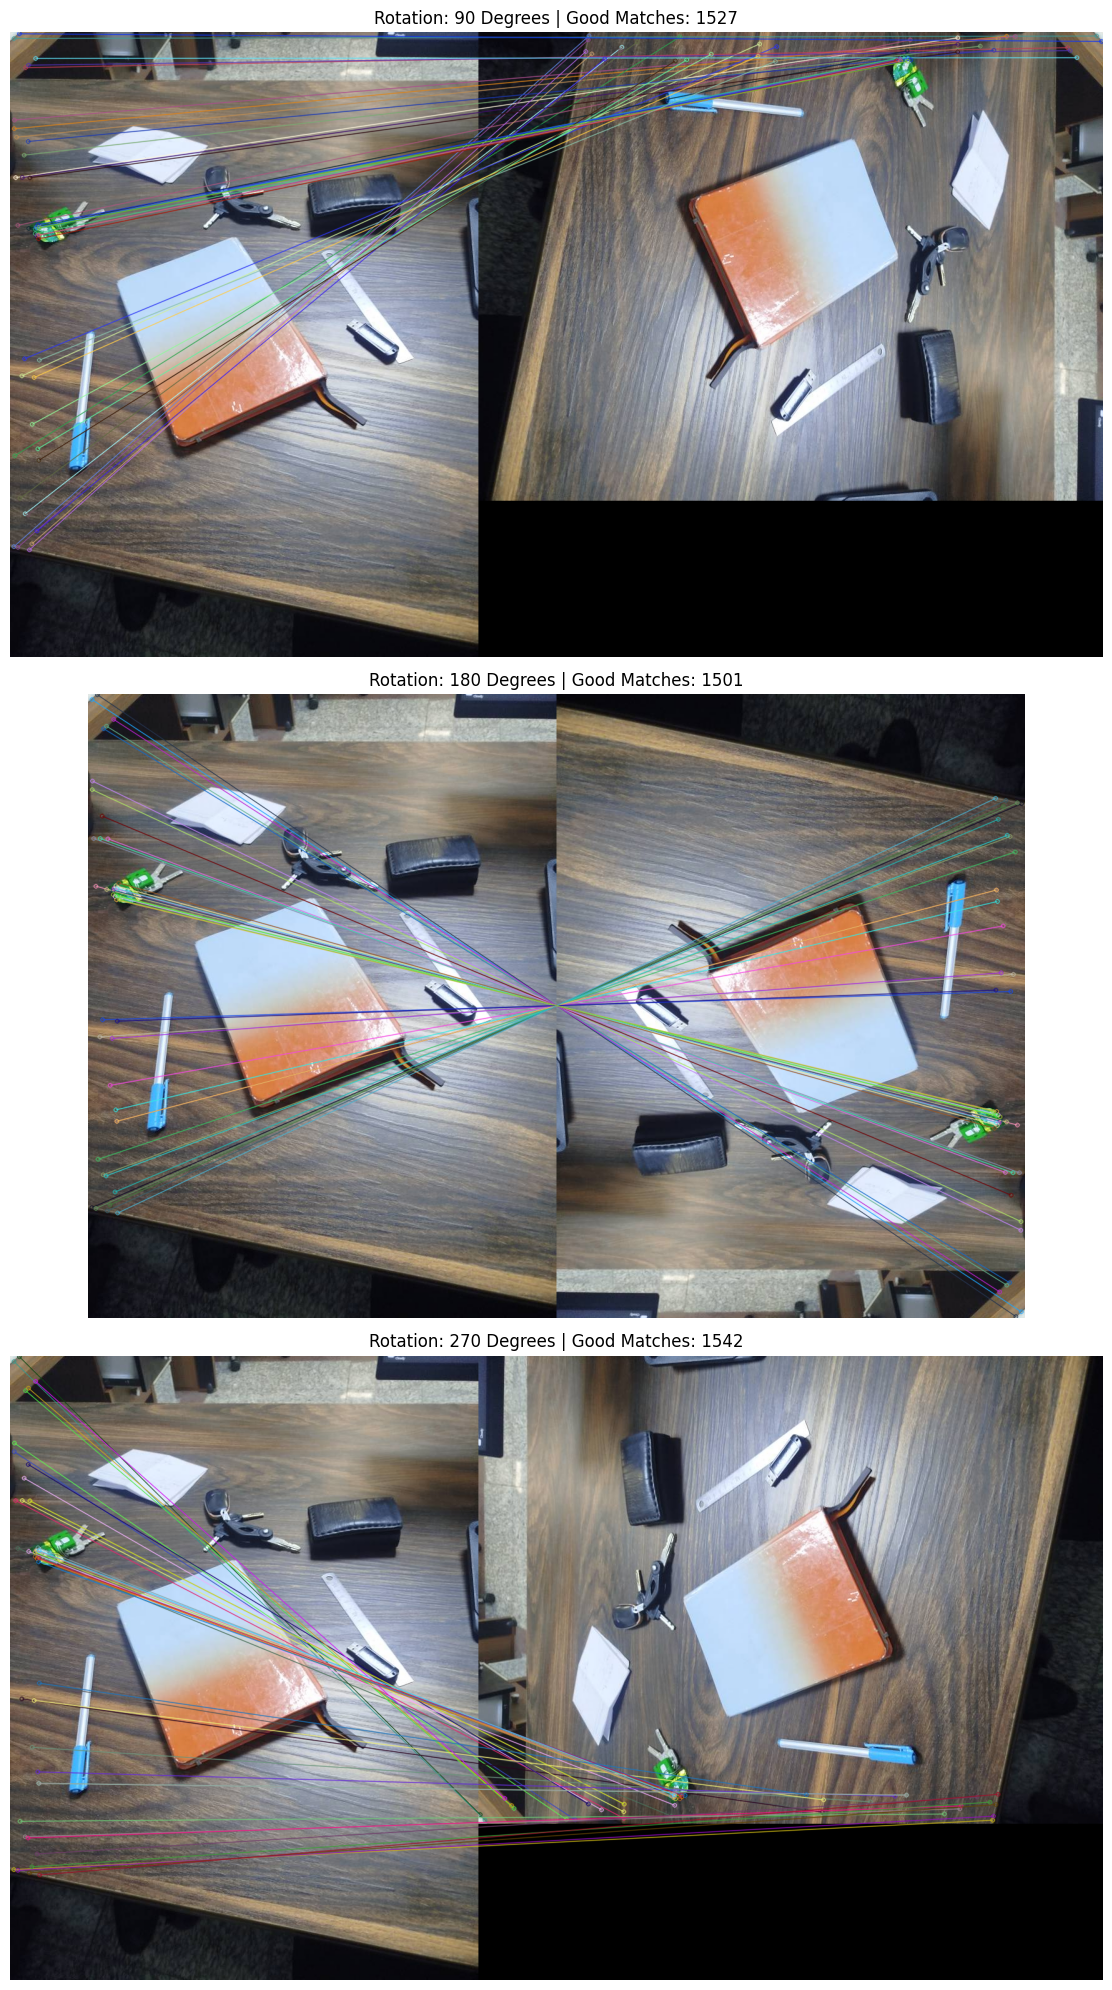

In [ ]:
import matplotlib.pyplot as plt

# 1. Initialize SIFT and extract features from the original image
sift = cv2.SIFT_create()
kp_ref, des_ref = sift.detectAndCompute(img2, None)

# 2. Define image list and configuration
rotated_images = [img_90, img_180, img_270]
labels = ["90 Degrees", "180 Degrees", "270 Degrees"]
bf = cv2.BFMatcher()

results_imgs = []
match_counts = []

# 3. Main loop: feature extraction, matching, and preparation for visualization
for img_rot, label in zip(rotated_images, labels):
    # a) Extract keypoints of the rotated image (on the fly)
    kp_rot, des_rot = sift.detectAndCompute(img_rot, None)
    
    # b) Match features
    matches = bf.knnMatch(des_ref, des_rot, k=2)
    
    # c) Apply the Ratio Test
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
    match_counts.append(len(good_matches))
    
    # d) Draw matching lines (only the first 40 to avoid clutter)
    res = cv2.drawMatches(
        img2, kp_ref,
        img_rot, kp_rot,
        good_matches[:40],
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    results_imgs.append(res)

# 4. Display results side by side
plt.figure(figsize=(15, 20))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    # Convert BGR to RGB for correct display in Matplotlib
    plt.imshow(cv2.cvtColor(results_imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Rotation: {labels[i]} | Good Matches: {match_counts[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<div dir="rtl" >

### تحلیل و نتیجه‌گیری
مشاهده شد که با وجود چرخش‌های ۹۰، ۱۸۰ و ۲۷۰ درجه، الگوریتم **SIFT** موفق شد با دقت بالایی نقاط متناظر را شناسایی کند. 

* **ثبات در تطبیق:** تعداد تطبیق‌های عبور کرده از **Ratio Test** در هر سه حالت تفاوت ناچیزی داشت (کمتر از ۵٪ اختلاف).
* **نتیجه:** این موضوع نشان‌دهنده مقاومت عالی این توصیف‌گر در برابر تغییرات هندسی از نوع چرخش (Rotation Invariance) است.

</div>